# Perceptron and SGD



In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron



iris = load_iris()

# We only consider petal dimensions to simplify the data set
X = iris.data[:,[2,3]]

# We are only interested in classifying Setosa instances (wich are linearly separable from the others)
y = (iris.target == 0).astype(int) # Iris Setosa?
y = y-(y==0) # map to {-1,1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Let's visualize the **0/1 loss** varying 1 weight. We will see that it is difficult to apply SGD to this loss function!

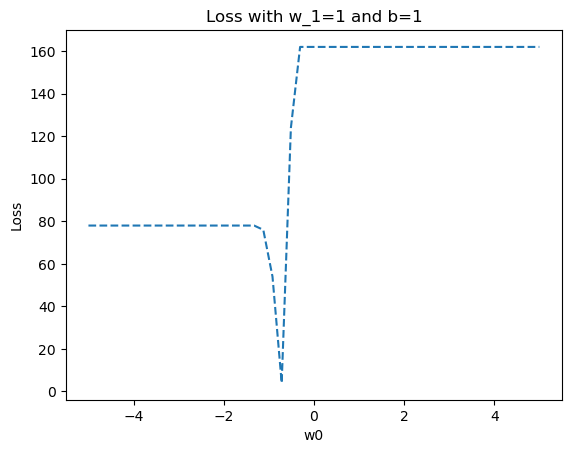

In [2]:
import matplotlib.pyplot as plt

def loss (w0, w1=1, b=1):
    N=X_train.shape[0]
    return sum([1 - y_train[i]*np.sign(w0*X_train[i,0] + w1*X_train[i,1] + b) for i in range(N)])

myX = np.linspace(-5, 5)
myY = [loss(w) for w in myX]


_, ax = plt.subplots()

# plotting the decision boundary
ax.plot(myX, myY, '--')

ax.set_xlabel("w0")
ax.set_ylabel("Loss")
ax.set_title("Loss with w_1=1 and b=1")

plt.show()


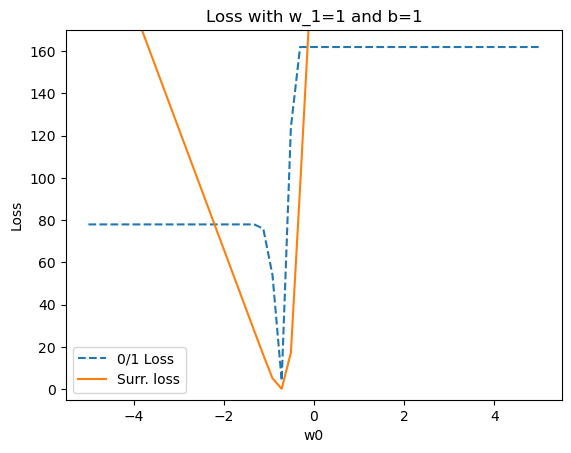

In [3]:
def surr_loss (w0, w1=1, b=1):   
    N=X_train.shape[0]
    return sum([max(0,-y_train[i]*(w0*X_train[i,0] + w1*X_train[i,1] + b)) for i in range(N)])

myY = [loss(w) for w in myX]
myYsurr = [surr_loss(w) for w in myX]

_, ax = plt.subplots()

# plotting the decision boundary
ax.plot(myX, myY, '--', label="0/1 Loss")
# plotting the decision boundary
ax.plot(myX, myYsurr, '-', label="Surr. loss")

ax.set_xlabel("w0")
ax.set_ylabel("Loss")
ax.set_title("Loss with w_1=1 and b=1")

ax.set_ylim(bottom=-5,top=170)
ax.legend()

plt.show()
